In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## porcentaje de valores na

Preliminarmente, reconocemos que las variables para predecir la precipitación es la "temperatura" y "humedad". Por lo que podemos prescindir del sol, evaporación, nubosidad (9am) y nubosidad (3pm)

In [7]:
(df.isna().sum()/df.count())*100

Date              0.000000
Location          0.000000
MinTemp           1.031429
MaxTemp           0.874486
Rainfall          2.293265
Evaporation      75.952583
Sunshine         92.343802
WindGustDir       7.641304
WindGustSpeed     7.591145
WindDir9am        7.832817
WindDir3pm        2.993656
WindSpeed9am      1.229705
WindSpeed3pm      2.150311
Humidity9am       1.858465
Humidity3pm       3.197520
Pressure9am      11.553357
Pressure3pm      11.521712
Cloud9am         62.394498
Cloud3pm         68.939165
Temp9am           1.229705
Temp3pm           2.544219
RainToday         2.293265
RainTomorrow      2.297581
dtype: float64

In [8]:
df.drop(["Sunshine","Evaporation","Cloud9am","Cloud3pm"],axis=1,inplace=True)

In [9]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [10]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
(df.isna().sum()/df.count())*100

Date              0.000000
Location          0.000000
MinTemp           1.031429
MaxTemp           0.874486
Rainfall          2.293265
WindGustDir       7.641304
WindGustSpeed     7.591145
WindDir9am        7.832817
WindDir3pm        2.993656
WindSpeed9am      1.229705
WindSpeed3pm      2.150311
Humidity9am       1.858465
Humidity3pm       3.197520
Pressure9am      11.553357
Pressure3pm      11.521712
Temp9am           1.229705
Temp3pm           2.544219
RainToday         2.293265
RainTomorrow      2.297581
dtype: float64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
df.rename(columns={"Date": "Fecha", "Location":"Ubicacion","Rainfall":"Precipitacion",
                  "WindGustDir":"Dirección del viento", "WindGustSpeed":"Velocidad del viento",
                  "WindDir9am":"Dirección del viento (9am)", "WindDir3pm":"Dirección del viento (3pm)",
                  "WindSpeed9am":"Velocidad del viento (9am)", "WindSpeed3pm":"Velocidad del viento (3pm)",
                  "Humidity9am":"Humedad (9am)", "Humidity3pm":"Humedad (3pm)", "Pressure9am":"Presion (9am)",
                  "Pressure3pm":"Presion (3pm)", "Temp9am": "Temperatura (9am)", "Temp3pm": "Temperatura (3pm)",
                  "RainToday":"Lluvia hoy", "RainTomorrow": "Lluvia mañana"},inplace=True)

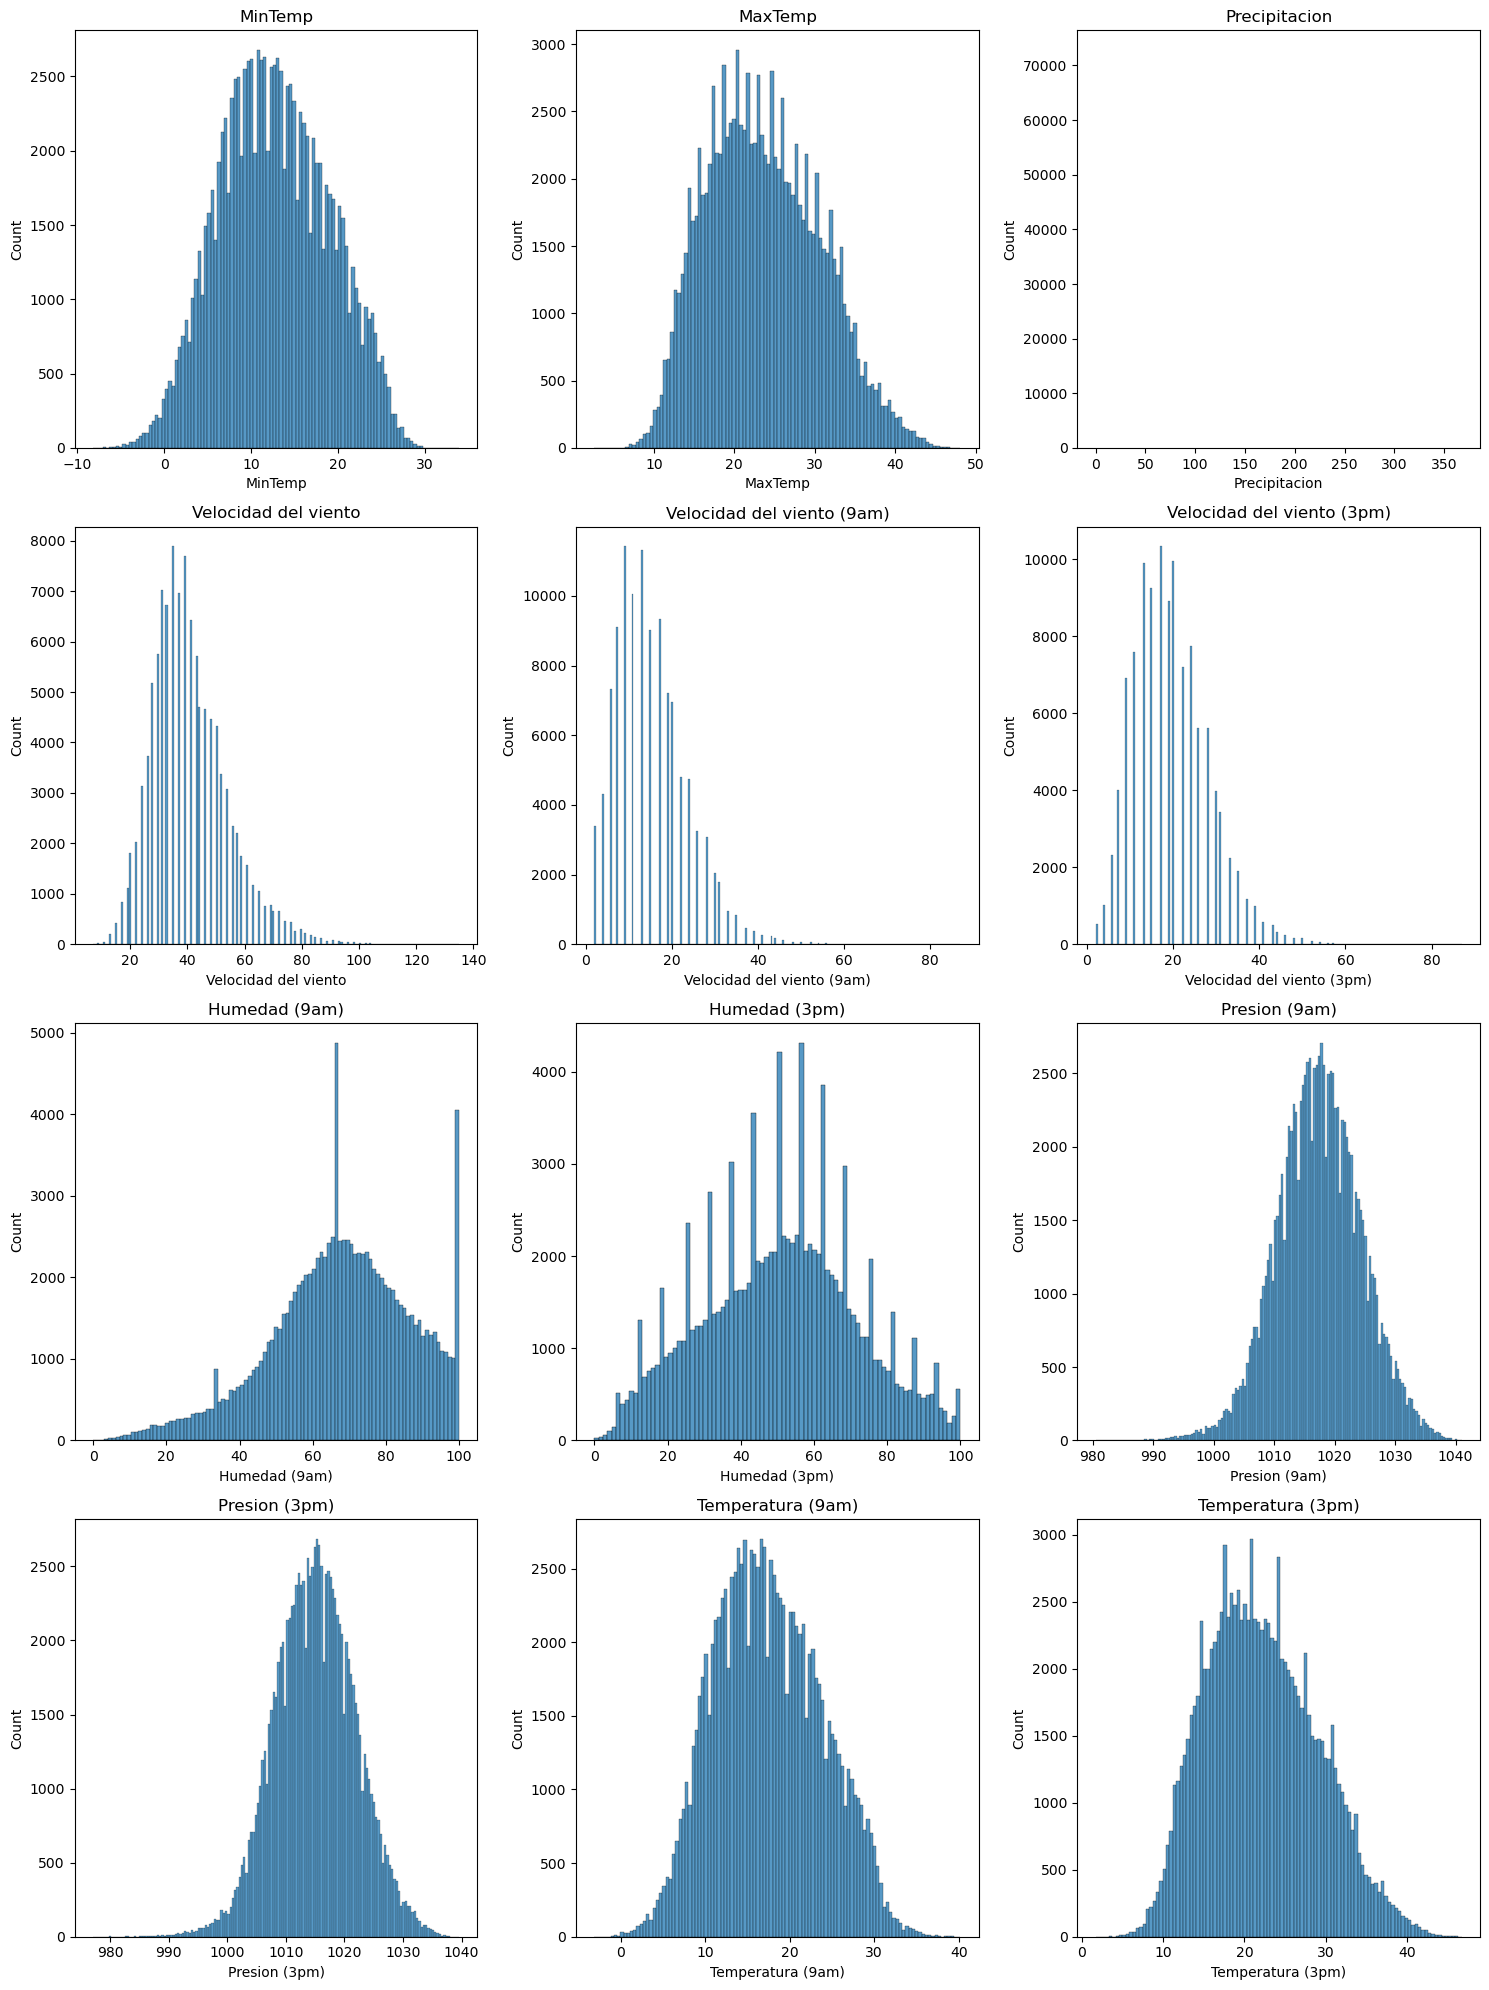

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# n = df.select_dtypes(include='number')
n_cols = 3  
n_rows = (len(df.select_dtypes(include='number').columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()


for i, column in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(df.select_dtypes(include='number')[column], ax=axes[i])
    axes[i].set_title(f'{column}')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



In [24]:
df2=df.groupby("Ubicacion").mean()

C:\Users\esco1\AppData\Local\Temp\ipykernel_18312\2492915845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby("Ubicacion").mean()


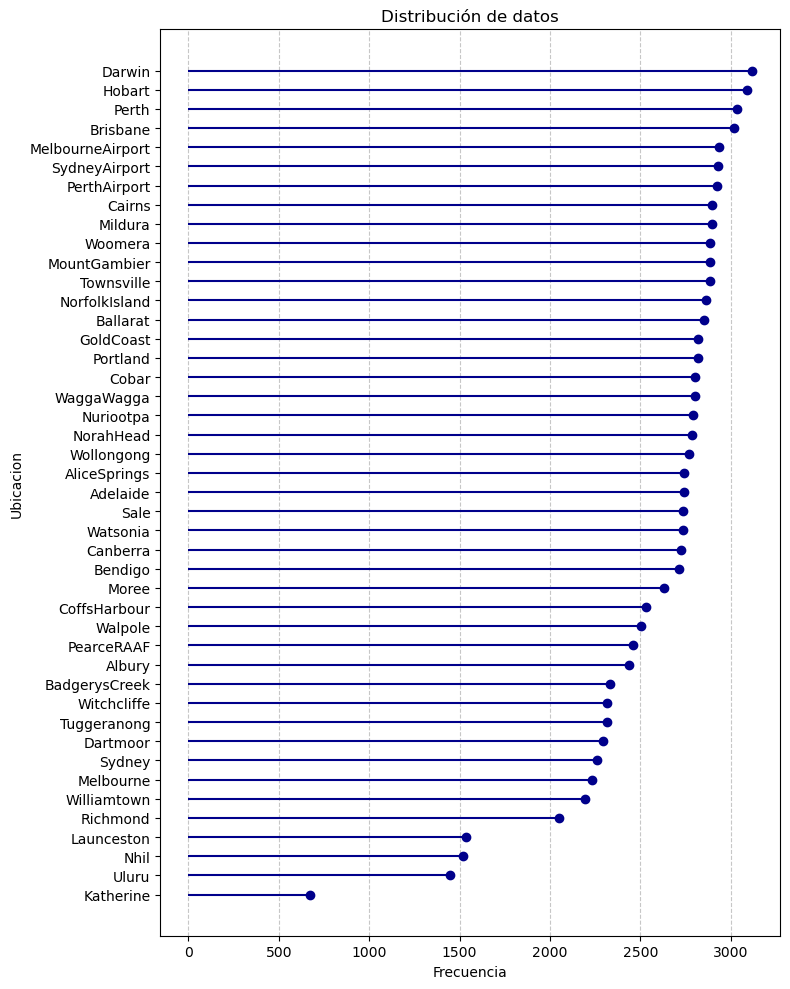

In [25]:
value_counts = df['Ubicacion'].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Ubicacion', 'count']

value_counts_df.sort_values('count', ascending=True, inplace=True)

plt.figure(figsize=(8, 10))

plt.hlines(y=value_counts_df['Ubicacion'], xmin=0, xmax=value_counts_df['count'], color='darkblue')

plt.plot(value_counts_df['count'], value_counts_df['Ubicacion'], 'o', color='darkblue')

plt.xlabel('Frecuencia')
plt.ylabel('Ubicacion')
plt.title('Distribución de datos')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\esco1\AppData\Local\Temp\ipykernel_18312\1095577018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True, center=0)


<Axes: >

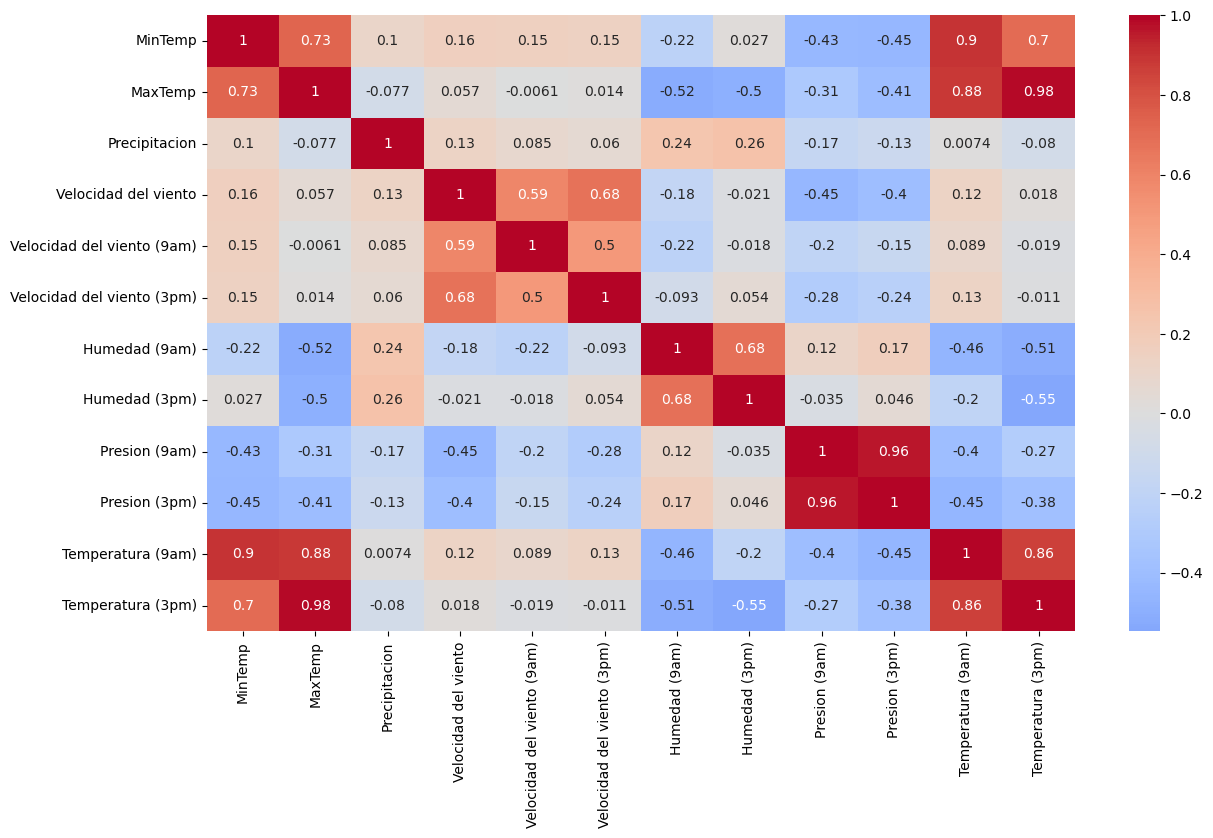

In [48]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, center=0)

In [67]:
df2=df.groupby("Ubicacion").median()
df3 = df.groupby("Ubicacion").var()


C:\Users\esco1\AppData\Local\Temp\ipykernel_18312\2828527299.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby("Ubicacion").median()
C:\Users\esco1\AppData\Local\Temp\ipykernel_18312\2828527299.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df.groupby("Ubicacion").var()


# Ciudades con los mayores promedios de cada categoría

In [71]:
df2.idxmax(axis=0)

MinTemp                              Darwin
MaxTemp                           Katherine
Precipitacion                      Dartmoor
Velocidad del viento          SydneyAirport
Velocidad del viento (9am)         Ballarat
Velocidad del viento (3pm)        GoldCoast
Humedad (9am)                      Dartmoor
Humedad (3pm)                     NorahHead
Presion (9am)                       Mildura
Presion (3pm)                      Portland
Temperatura (9am)                    Darwin
Temperatura (3pm)                 Katherine
dtype: object

# Ciudades con los menores promedios de cada categoría

In [74]:
df2.idxmin(axis=0)

MinTemp                           Ballarat
MaxTemp                           Ballarat
Precipitacion                     Adelaide
Velocidad del viento              Brisbane
Velocidad del viento (9am)        Brisbane
Velocidad del viento (3pm)        Brisbane
Humedad (9am)                 AliceSprings
Humedad (3pm)                 AliceSprings
Presion (9am)                       Darwin
Presion (3pm)                    Katherine
Temperatura (9am)                 Ballarat
Temperatura (3pm)                 Ballarat
dtype: object

# Ciudades con mayor varianza de cada categoría

In [72]:
df3.idxmax(axis=0)

MinTemp                       AliceSprings
MaxTemp                              Cobar
Precipitacion                       Cairns
Velocidad del viento                Hobart
Velocidad del viento (9am)       Melbourne
Velocidad del viento (3pm)      Wollongong
Humedad (9am)                 AliceSprings
Humedad (3pm)                     Ballarat
Presion (9am)                       Hobart
Presion (3pm)                       Hobart
Temperatura (9am)                    Uluru
Temperatura (3pm)               WaggaWagga
dtype: object

# Ciudades con menor varianza de cada categoría

In [73]:
df3.idxmin(axis=0)

MinTemp                       NorfolkIsland
MaxTemp                              Darwin
Precipitacion                       Woomera
Velocidad del viento             Townsville
Velocidad del viento (9am)         Brisbane
Velocidad del viento (3pm)         Brisbane
Humedad (9am)                        Cairns
Humedad (3pm)                 NorfolkIsland
Presion (9am)                        Darwin
Presion (3pm)                        Darwin
Temperatura (9am)             NorfolkIsland
Temperatura (3pm)                    Darwin
dtype: object